In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## LinearRegression

In [2]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

In [3]:
xarray = np.hstack(x)

In [4]:
yarray = np.hstack(y)

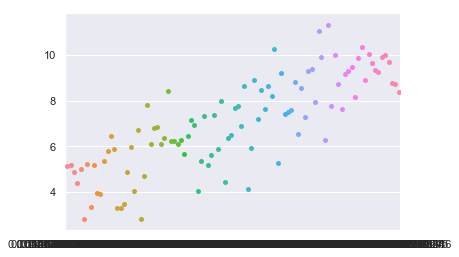

In [6]:
%matplotlib inline
sns.stripplot(xarray,yarray)

In [7]:
x_b = np.c_[np.ones((100,1)),x]

In [8]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [9]:
theta_best

array([[4.09157469],
       [3.02059911]])

In [10]:
X_new = np.array([[0], [2]])

In [11]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [12]:
y_predict = X_new_b.dot(theta_best)

In [13]:
y_predict

array([[ 4.09157469],
       [10.13277291]])

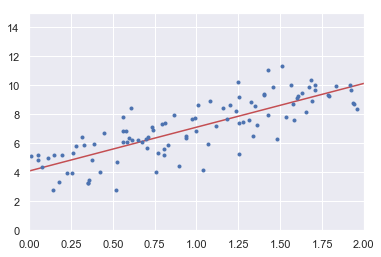

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(xarray, yarray, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [38]:
lin_reg = LinearRegression()

In [39]:
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
lin_reg.intercept_, lin_reg.coef_

(array([3.73393821]), array([[3.32899483]]))

In [41]:
lin_reg.predict(X_new)

array([[ 3.73393821],
       [10.39192788]])

In [43]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)

In [44]:
theta_best_svd

array([[3.73393821],
       [3.32899483]])

In [45]:
np.linalg.pinv(x_b).dot(y)

array([[3.73393821],
       [3.32899483]])

## Gradient Descent

In [46]:
# Batch Gradient Descent
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [47]:
theta

array([[3.73393821],
       [3.32899483]])

In [48]:
from sklearn.linear_model import SGDRegressor

In [49]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [50]:
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [51]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.70215002]), array([3.37271967]))

## Polynomial Regression

In [2]:
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x**2 +x + 2 + np.random.randn(m,1)

In [6]:
xarray.shape

(100,)

In [7]:
yarray.shape

(100,)

In [4]:
xarray = np.hstack(x)

In [5]:
yarray = np.hstack(y)

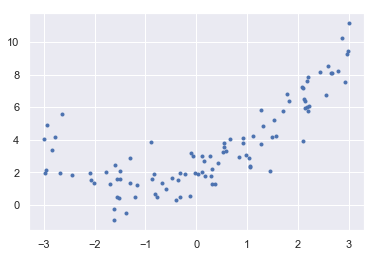

In [8]:
plt.plot(xarray, yarray, "b.")
# plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [11]:
x_poly = poly_features.fit_transform(x)

In [12]:
x[0]

array([-2.00432169])

In [13]:
x_poly[0]

array([-2.00432169,  4.01730544])

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc='upper right')

In [22]:
%matplotlib
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

Using matplotlib backend: Qt5Agg


In [23]:
from sklearn.pipeline import Pipeline

In [24]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

In [25]:
plot_learning_curves(polynomial_regression, x, y)

In [26]:
!export http_proxy="http://127.0.0.1:12333"
!export https_proxy="http://127.0.0.1:12333"

In [27]:
from sklearn import datasets

In [28]:
iris = datasets.load_iris()

In [29]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [35]:
df = pd.read_csv('/home/viewv/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/sklearn/datasets/data/iris.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
150           150 non-null float64
4             150 non-null float64
setosa        150 non-null float64
versicolor    150 non-null float64
virginica     150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [38]:
x = iris["data"][:, 3:]

In [39]:
y = (iris["target"] == 2).astype(np.int)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_reg = LogisticRegression()
log_reg.fit(x, y)

/home/viewv/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()